# Import Packages

In [1]:
import numpy as np                       #numpy enables functions for data arrays
import matplotlib.pyplot as plt          #matplotlib enables plotting routines

In [2]:
cluster = np.loadtxt("cluster.txt")
cluster_b = cluster[:,1]
cluster_v = cluster[:,2]

# constants in cgs units

In [3]:
#The Planck Constant
h = 6.626 * 10**(-27)  #erg*sec

#The Boltzmann Constant
k = 1.381 * 10**(-16)  #erg/K

#Speed of light
c = 2.998 * 10**(10)   #cm/sec

# enter temp, lambda

In [12]:
temp = np.arange(2000, 20000, 1000)         
#in nm unit
lambdaRange_nm = np.array([440,550])
#convert into cm
lambdaRange_cm = lambdaRange_nm*(1e-7)

In [13]:
Temp, WaveRange = np.meshgrid(temp,lambdaRange_cm)    

# Calculate Planck

In [14]:
calc_top = 2*h*c**2
expo = (h*c)/(WaveRange*k*Temp)
calc_bot = (WaveRange**5)*(np.exp(expo)-1)
planck_result = calc_top/calc_bot

In [15]:
# B/V 
bv_ratio = planck_result[0]/planck_result[1]

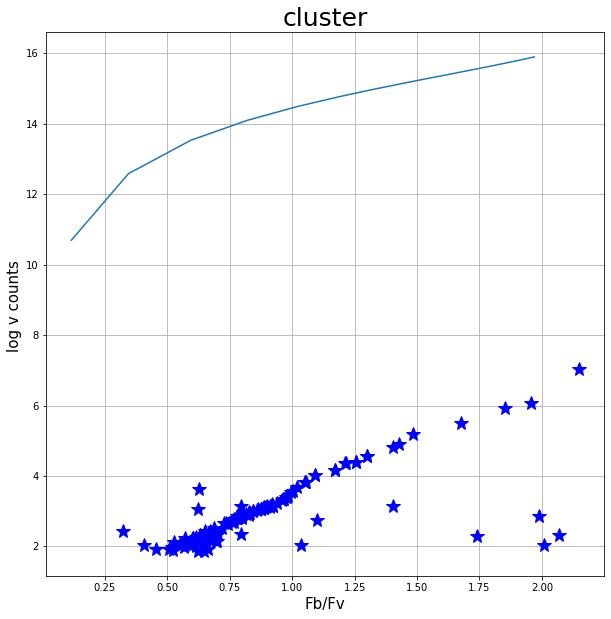

In [16]:
# B/V for cluster
bv_ratio_cluster = cluster_b/cluster_v

# plot Planck function as a function of wave for each temp
plt.figure(figsize=(10,10))
plt.plot(bv_ratio, np.log10(planck_result[1]),'-', markersize = 15, label=['planck result'])
plt.plot(bv_ratio_cluster, np.log10(cluster_v),'b*', markersize = 15)
plt.ylabel("log v counts ", size=15)
plt.xlabel("Fb/Fv",size=15)
plt.title('cluster', size = 25)
plt.grid()

In [17]:
#find the value assoicated with b/v = 1 in planck function
minvalue = 1
index = 0
for x in range(len(bv_ratio)):
    if (abs(1 - bv_ratio[x]) < minvalue):
        minvalue = 1 - bv_ratio[x]
        index = x
print(index)
planck_v = planck_result[1]
planck1 = planck_v[index];
print(planck1)


4
306678278611852.4


In [18]:
#find the value assoicated with b/v = 1 in cluster 
minvalue = 1
index = 0
for x in range(len(bv_ratio_cluster)):
    if (abs(1 - bv_ratio_cluster[x]) < minvalue):
        minvalue = 1 - bv_ratio_cluster[x]
        index = x
print(index)
cluster1 = cluster_v[index]

print(cluster1)
    


16
3600.0


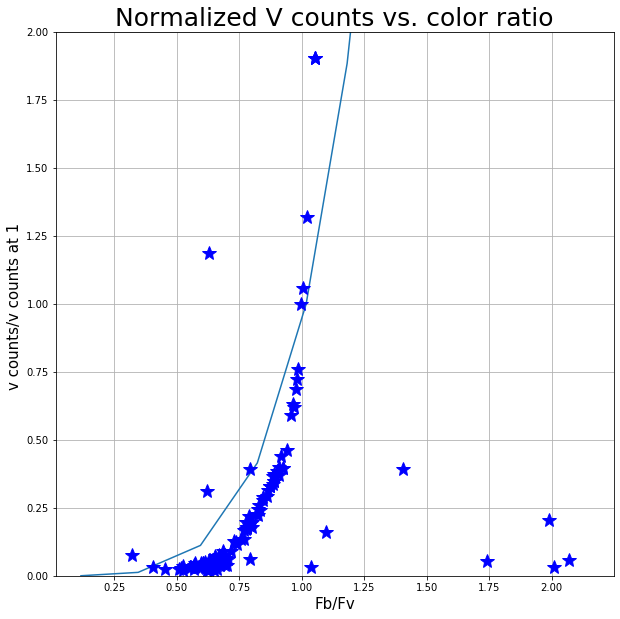

In [19]:
#Normalization
plt.figure(figsize=(10,10))
plt.plot(bv_ratio, planck_result[1]/planck1,'-', markersize = 15)
plt.plot(bv_ratio_cluster, cluster_v/cluster1,'b*', markersize = 15)
plt.ylim([0,2])
plt.ylabel("v counts/v counts at 1 ", size=15)
plt.xlabel("Fb/Fv",size=15)
plt.title('Normalized V counts vs. color ratio', size = 25)
plt.grid()

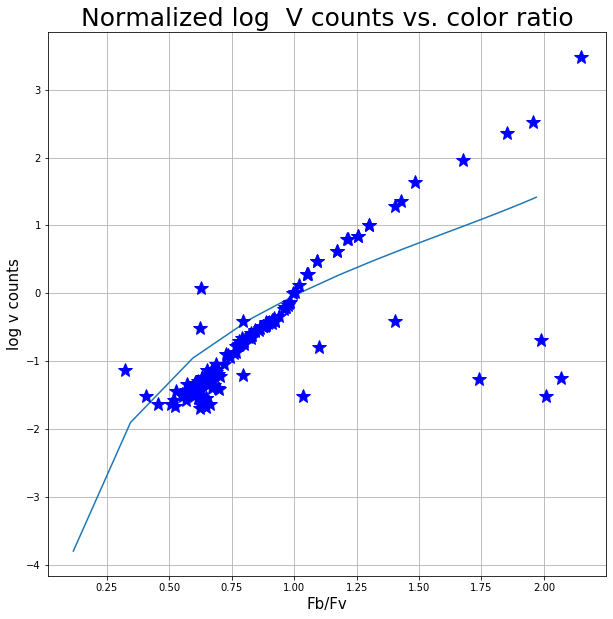

In [24]:
#Normalization without log
plt.figure(figsize=(10,10))
plt.plot(bv_ratio, np.log10(planck_result[1]/planck1),'-', markersize = 15)
plt.plot(bv_ratio_cluster, np.log10(cluster_v/cluster1),'b*', markersize = 15)
plt.ylabel("log v counts", size=15)
plt.xlabel("Fb/Fv",size=15)
plt.title('Normalized log  V counts vs. color ratio', size = 25)
plt.grid()